In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib.pyplot import figure

df = pd.read_csv('/Users/hungtran/Documents/Tài liệu/DT2111L/Project/Group 3/Data/final_ds.csv')
df = df[df['Age'].isin(['25-34 years old',
                        '35-44 years old',
                        '18-24 years old',
                        '45-54 years old',
                        '55-64 years old'])]
df['EdLevel'] = df['EdLevel'].replace(
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Secondary school')
pd.options.display.float_format = '${:,.2f}'.format

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ResponseId', 'MainBranch', 'Employment',
       'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode',
       'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'PurchaseInfluence', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'OpSysProfessional use', 'OpSysPersonal use',
       'VersionControlSystem', 'VCInteraction', 'Age', 'Gender', 'AnualComp',
       'CurrencyCode', 'ExchangeRate', 'AnualCompInUSD'],
      dtype='object')

In [19]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (25, 20),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [20]:
def plot_null_matrix(df, figsize=(10, 8)):  # initiate the figure
    plt.figure(figsize=figsize)  # create a boolean dataframe based on whether values are null
    df_null = df.isnull()  # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.show()

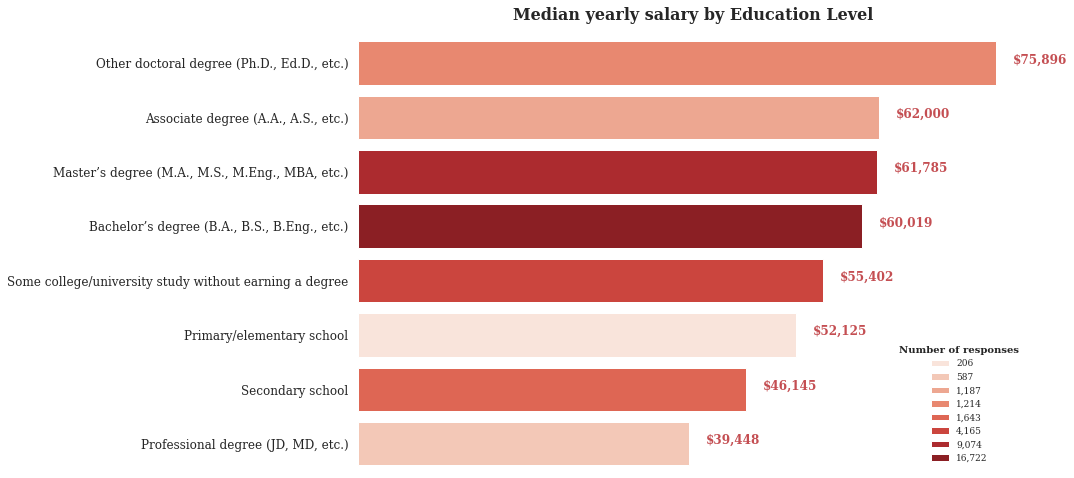

In [21]:
#Create dataframe with education level and median salary
pv_EdLevel_mean = pd.pivot_table(data=df[df['EdLevel'] != 'Something else'],
                                 index='EdLevel', values='AnualCompInUSD',
                                 aggfunc='median')
pv_EdLevel_count = pd.pivot_table(data=df[df['EdLevel'] != 'Something else'],
                                  index='EdLevel', values='AnualCompInUSD',
                                  aggfunc='count')
pv_EdLevel = pv_EdLevel_mean.merge(right=pv_EdLevel_count,
                                   left_index=True,
                                   right_index=True)
pv_EdLevel.rename(columns={'AnualCompInUSD_x': 'MedianAnual',
                           'AnualCompInUSD_y': 'CountAnual'},
                  inplace=True)
pv_EdLevel = pv_EdLevel.sort_values(by='MedianAnual', ascending=False)

#Visualization
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
plot1 = sns.barplot(data=pv_EdLevel, y=pv_EdLevel.index, x='MedianAnual', hue='CountAnual', dodge=False, palette='Reds')
plot1.set_yticklabels(labels=pv_EdLevel.index, size=12, fontdict={'family': 'serif', 'size': 12, 'weight': 'normal'})
plot1.set_xticklabels(labels='', size=12, fontdict={'family': 'serif', 'size': 12, 'weight': 'normal'})
plt.xlabel(xlabel='', fontsize=16)
plt.ylabel(ylabel='', fontsize=16)
ax.grid(alpha=0)
plt.title('Median yearly salary by Education Level', fontsize=16, loc='center', pad=16,
          fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
sns.despine(left=True, bottom=True)
for i, v in enumerate(pv_EdLevel['MedianAnual']):
    ax.text(v + 2000, i, '${:,.0f}'.format(v), color='r', fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
    plt.legend(loc='lower right', title='Number of responses',
               title_fontproperties={'family': 'serif', 'weight': 'bold', 'size': 10},
               prop={'family': 'serif', 'weight': 'normal', 'size': 9})
led1 = plot1.get_legend()
led1_text = led1.get_texts()
for text in led1_text:
    i = text.get_text()
    i = i.replace('.0', '')
    new_i = '{:,.0f}'.format(int(i))
    text.set_text(new_i)
plt.show()

/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/408922954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devtype_df.YearsCodePro[devtype_df['YearsCodePro'] == 'Less than 1 year'] = 1
/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/408922954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devtype_df.YearsCodePro[devtype_df['YearsCodePro'] == 'Less than 1 year'] = 1
/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/408922954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

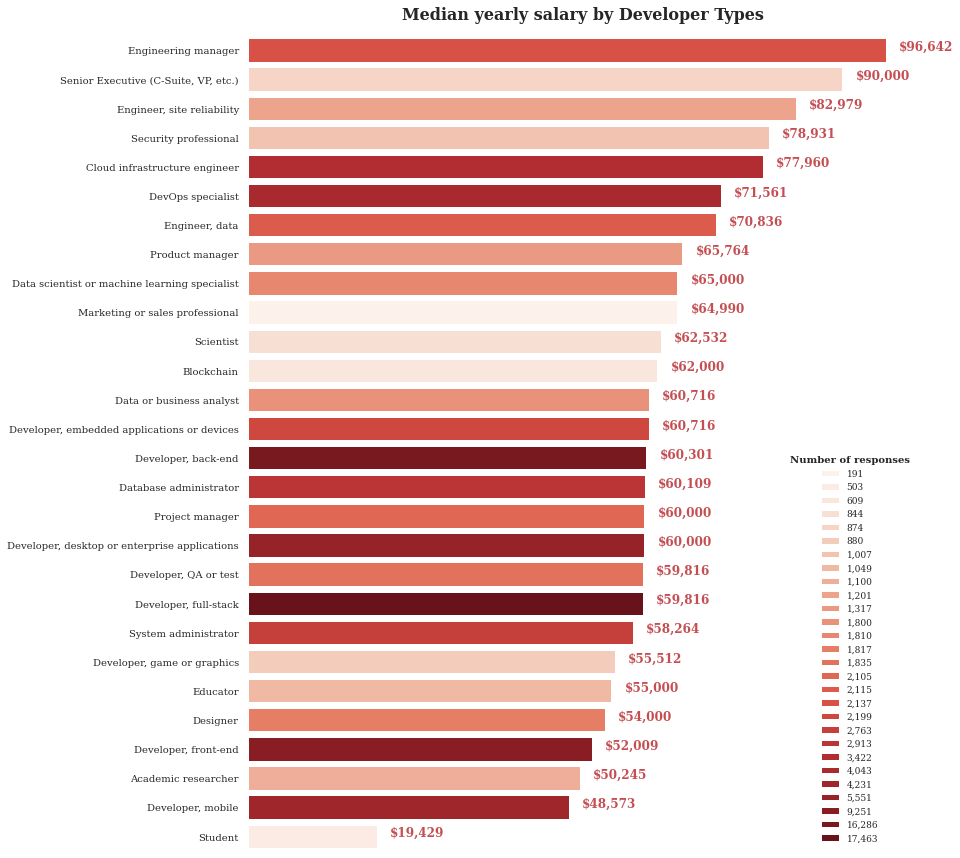

In [22]:
devtype_df = df[['ResponseId', 'DevType', 'AnualCompInUSD', 'YearsCodePro']]
devtype_df.YearsCodePro[devtype_df['YearsCodePro'] == 'Less than 1 year'] = 1
devtype_df.YearsCodePro[devtype_df['YearsCodePro'] == 'More than 50 years'] = 50
devtype_df.dropna(axis=0, inplace=True)
devtype_df.reset_index(inplace=True)
devtype_df['YearsCodePro'] = devtype_df['YearsCodePro'].astype('int64')

#Create a list of devtypes
dev_string = ''
for i in range(len(devtype_df)):
    dev_string += str(';' + str(devtype_df['DevType'][i]))
list_devtype = dev_string.split(';')  # Every response has multiple choices, each choice specify after ';'
list_devtype = list(set(list_devtype))  #create a list that have every unique choice
list_devtype.remove('')

# Create a list of salary base on devtypes
for i, value in enumerate(list_devtype):
    devtype_df.loc[devtype_df['DevType'].str.contains(pat=value, regex=False) == True, list_devtype[i]] = 1
    devtype_df.loc[devtype_df['DevType'].str.contains(pat=value, regex=False) != True, list_devtype[i]] = 0

list_salary_devtype = []
list_avg_yearscodepro = []
for i in list_devtype:
    salary = devtype_df.loc[devtype_df[i] == 1, 'AnualCompInUSD'].median()
    list_salary_devtype.append(salary)
    avg_yearscodepro = devtype_df.loc[devtype_df[i] == 1, 'YearsCodePro'].mean()
    list_avg_yearscodepro.append(avg_yearscodepro)

#Create dataframe of salary base on devtype
new_devtype_df = pd.DataFrame(
    {'DevType': list_devtype, 'Salary': list_salary_devtype, 'AvgYearsCodePro': list_avg_yearscodepro})
new_devtype_df = new_devtype_df.sort_values(by='Salary', ascending=False)

#Calculate number of responses and add number of responses to the new_devtype_df
No_responses = pd.DataFrame(devtype_df.iloc[:, 3:].sum(axis=0))
new_devtype_df = new_devtype_df.merge(No_responses, right_on=No_responses.index, left_on='DevType', how='inner')
new_devtype_df.rename(columns={0: 'Number of responses'}, inplace=True)

#Visualization
f, ax = plt.subplots(figsize=(12, 15))
new_devtype_df = new_devtype_df[new_devtype_df['DevType'] != 'Other (please specify):']
plot2 = sns.barplot(data=new_devtype_df, x='Salary', hue='Number of responses', y='DevType', palette='Reds',
                    dodge=False)
plt.title('Median yearly salary by Developer Types', fontsize=16, loc='center', pad=16,
          fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
ax.set_yticklabels(labels=new_devtype_df['DevType'], size=10, fontdict={'family': 'serif', 'weight': 'normal'})
plt.xlabel(xlabel='')
plt.ylabel(ylabel='')
ax.set_xticklabels(labels='', size=12, fontdict={'family': 'serif', 'size': 10, 'weight': 'normal'})
for i, v in enumerate(new_devtype_df['Salary']):
    ax.text(v + 2000, i, '${:,.0f}'.format(v), color='r', fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
ax.grid(alpha=0)
plt.legend(loc='lower right', title='Number of responses',
           title_fontproperties={'family': 'serif', 'weight': 'bold', 'size': 10},
           prop={'family': 'serif', 'weight': 'normal', 'size': 9})
led2 = plot2.get_legend()
led2_text = led2.get_texts()
for text in led2_text:
    i = text.get_text()
    i = i.replace('.0', '')
    new_i = '{:,.0f}'.format(int(i))
    text.set_text(new_i)
sns.despine(bottom=True, left=True)
plt.show()

In [ ]:
new_devtype_df = new_devtype_df.reset_index()

/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/1118789461.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=['$' + '{:,.0f}'.format(y) for y in plot7.get_yticks()], size=10,
/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/1118789461.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=[int(x) for x in plot7.get_xticks()], size=10,


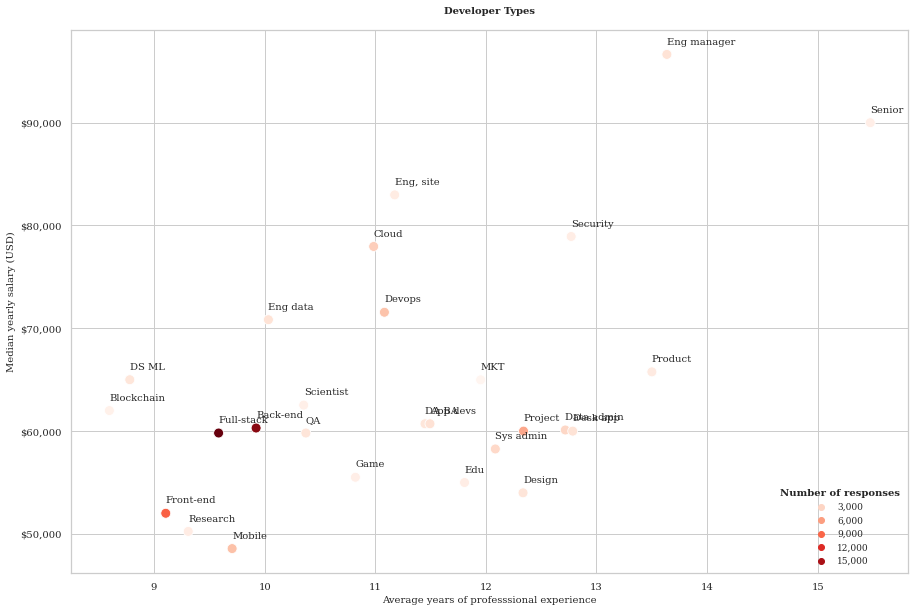

In [32]:
#Visualization average years of exp and median anual salary with each type of dev
f, ax = plt.subplots(figsize=(15, 10))
plot7 = sns.scatterplot(data=new_devtype_df[new_devtype_df['DevType'] != 'Student'], x='AvgYearsCodePro', y='Salary',
                        hue='Number of responses', palette='Reds', legend='brief', s=98)
plt.title('Developer Types', fontsize=10, loc='center', pad=16,
          fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
ax.set_yticklabels(labels=['$' + '{:,.0f}'.format(y) for y in plot7.get_yticks()], size=10,
                   fontdict={'family': 'serif', 'size': 10, 'weight': 'normal'})
# plot7.set_yticklabels(labels=['$' + '{:,.0f}'.format(y) for y in range(0,100001,10000)], size=10,
#                    fontdict={'family': 'serif', 'size': 10, 'weight': 'normal'})
ax.set_xticklabels(labels=[int(x) for x in plot7.get_xticks()], size=10,
                   fontdict={'family': 'serif', 'size': 10, 'weight': 'normal'})
plt.xlabel(xlabel='Average years of professsional experience',
           fontdict={'family': 'serif', 'size': 10, 'weight': 'normal'})
plt.ylabel(ylabel='Median yearly salary (USD)', fontdict={'family': 'serif', 'size': 10, 'weight': 'normal'})
annotations = ['Eng manager', 'Senior', 'Eng, site', 'Security', 'Cloud', 'Devops', 'Eng data', 'Product', 'DS ML',
               'MKT', 'Scientist', 'Blockchain', 'DA BA', 'App devs', 'Back-end', 'Data admin', 'Desk app', 'Project',
               'QA', 'Full-stack', 'Sys admin', 'Game', 'Edu', 'Design', 'Front-end', 'Research', 'Mobile']
plt.legend(loc='lower right', title='Number of responses',
           title_fontproperties={'family': 'serif', 'weight': 'bold', 'size': 10},
           prop={'family': 'serif', 'weight': 'normal', 'size': 9})
led = plot7.get_legend()
led_text = led.get_texts()

for text in led_text:
    i = text.get_text()
    new_i = '{:,.0f}'.format(int(i))
    text.set_text(new_i)

for i, label in enumerate(annotations):
    plt.annotate(label, (new_devtype_df['AvgYearsCodePro'][i], new_devtype_df['Salary'][i] + 1000), fontfamily='serif',
                 fontsize='small', fontweight='light')
plt.show()

/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/1223424978.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=['$'+'{:,.0f}'.format(x) for x in plot_10.get_yticks()],size=12,fontdict={'family':'serif','size':10,'weight':'normal'})
/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/1223424978.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=[int(i) for i in plot_10.get_xticks()],size=12,fontdict={'family':'serif','size':12,'weight':'normal'})


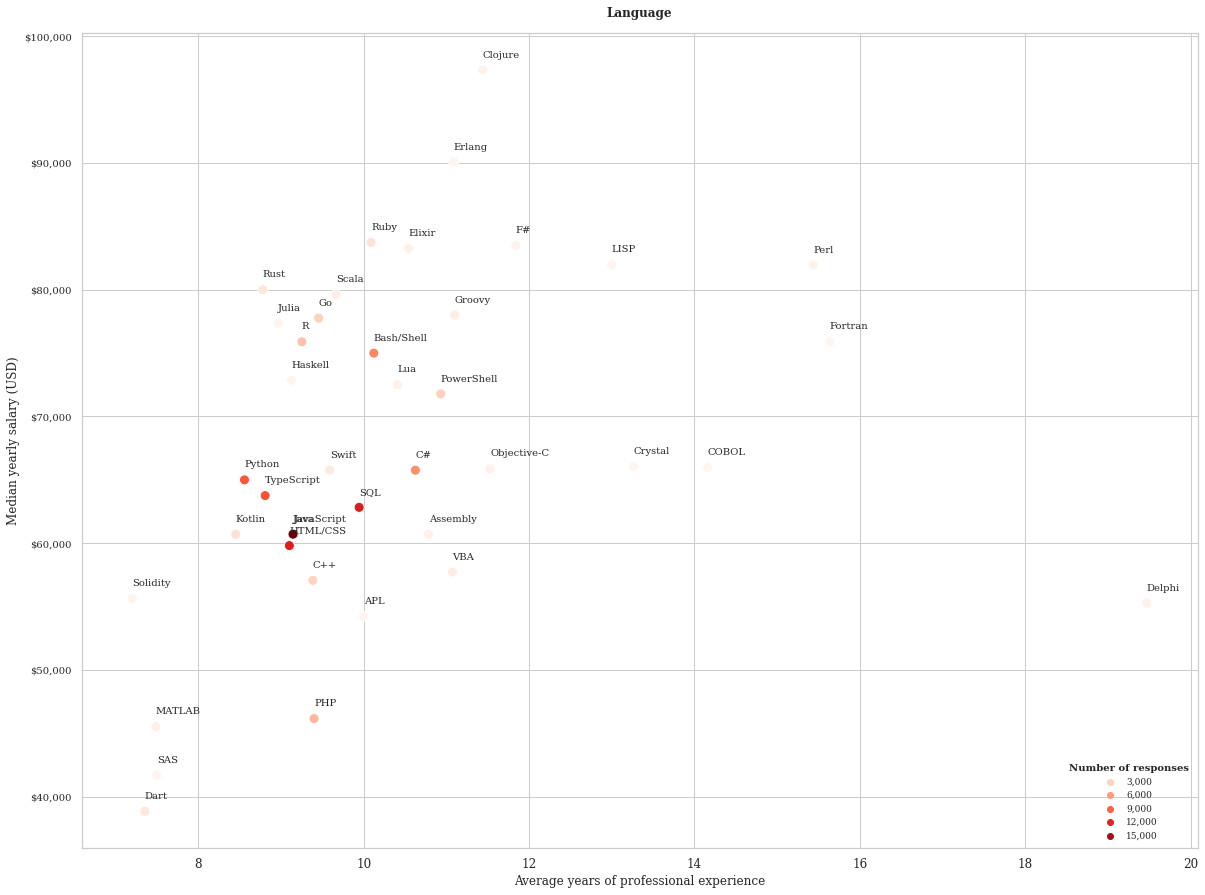

In [33]:
#Create a dataframe contain technology information
language_df = df[['MainBranch','LanguageHaveWorkedWith','LanguageWantToWorkWith','PlatformHaveWorkedWith','PlatformWantToWorkWith',"AnualCompInUSD",'YearsCodePro']]
language_df = language_df.dropna()
language_df = language_df.reset_index()
language_df.drop('index', axis = 1, inplace=True)

# Create a program list
set_1 =set()
for i in range(0,language_df.shape[0]):
    set_2 = set(str(language_df['LanguageHaveWorkedWith'][i]).split(";"))
    set_1.update(set_2)
list_programe = list(set_1)

#Insert column for each language
for i,value in enumerate(set_1):
    language_df.loc[language_df['LanguageHaveWorkedWith'].str.contains(pat=value,regex=False)==True,list_programe[i]] = 1
    language_df.loc[language_df['LanguageHaveWorkedWith'].str.contains(pat=value,regex=False)!=True,list_programe[i]] = 0

#Create final dataframe about language, salary and average professional experience to visualize
language_df.loc[language_df['YearsCodePro'] =='Less than 1 year','YearsCodePro'] = 1
language_df.loc[language_df['YearsCodePro']=='More than 50 years','YearsCodePro'] = 50
language_df['YearsCodePro'] = pd.to_numeric(language_df['YearsCodePro'])

list_median_income = []
list_mean_yearcode = []
for i,value in enumerate(list_programe):
    med = language_df[language_df[value]==1]['AnualCompInUSD'].median()
    list_median_income.append(med)
    mean_l = language_df[language_df[value]==1]['YearsCodePro'].mean()
    list_mean_yearcode.append(mean_l)
d ={'Program':list_programe,'Median of Income':list_median_income,'Mean of Year Code':list_mean_yearcode}
new_language_df = pd.DataFrame(data=d)

No_reponses = pd.DataFrame(language_df.iloc[:,9:].sum(axis=0))
new_language_df = new_language_df.merge(No_reponses,right_on =No_reponses.index,left_on='Program',how ='inner')
new_language_df.rename(columns={0:'Number of responses'},inplace=True)

#Visualization

f,ax = plt.subplots(figsize=(20,15))
plot_10 = sns.scatterplot(data=new_language_df,x='Mean of Year Code',y='Median of Income',hue='Number of responses',palette="Reds",legend='brief',s=98)
ax.set_yticklabels(labels=['$'+'{:,.0f}'.format(x) for x in plot_10.get_yticks()],size=12,fontdict={'family':'serif','size':10,'weight':'normal'})
ax.set_xticklabels(labels=[int(i) for i in plot_10.get_xticks()],size=12,fontdict={'family':'serif','size':12,'weight':'normal'})
plt.title('Language', fontsize=12, loc='center', pad=16,
          fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.xlabel(xlabel='Average years of professional experience', fontdict={'family':'serif','size':12,'weight':'normal'})
plt.ylabel(ylabel='Median yearly salary (USD)',fontdict={'family':'serif','size':12,'weight':'normal'})
annotations = ['PHP','Swift','Objective-C', 'C','C#', 'Solidity','LISP', 'Groovy','Elixir', 'JavaScript','Delphi', 'Dart','SAS', 'COBOL','Perl', 'OCaml','Haskell', 'Scala','F#', 'Bash/Shell','Kotlin', 'APL','Python', 'MATLAB','C++', 'Fortran','Clojure', 'VBA','Erlang', 'Rust','HTML/CSS', 'Go','R', 'PowerShell','Assembly', 'Julia','Crystal', 'Lua','SQL', 'TypeScript','Ruby','Java']
plt.legend(loc='lower right',title='Number of responses', title_fontproperties = {'family':'serif','weight':'bold','size':10}, prop={'family': 'serif', 'weight': 'normal', 'size': 9})
led = plot_10.get_legend()
led_text = led.get_texts()

for text in led_text:
    i = text.get_text()
    new_i = '{:,.0f}'.format(int(i))
    text.set_text(new_i)
for i, label in enumerate(list(new_language_df['Program'])):
    plt.annotate(label,(new_language_df['Mean of Year Code'][i],new_language_df['Median of Income'][i]+1000),fontfamily='serif',fontsize=10,fontweight='light')
plt.show()

/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/752124061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_df.YearsCodePro[status_df['YearsCodePro'] == 'Less than 1 year'] = 1
/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/752124061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_df.YearsCodePro[status_df['YearsCodePro'] == 'Less than 1 year'] = 1
/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/752124061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

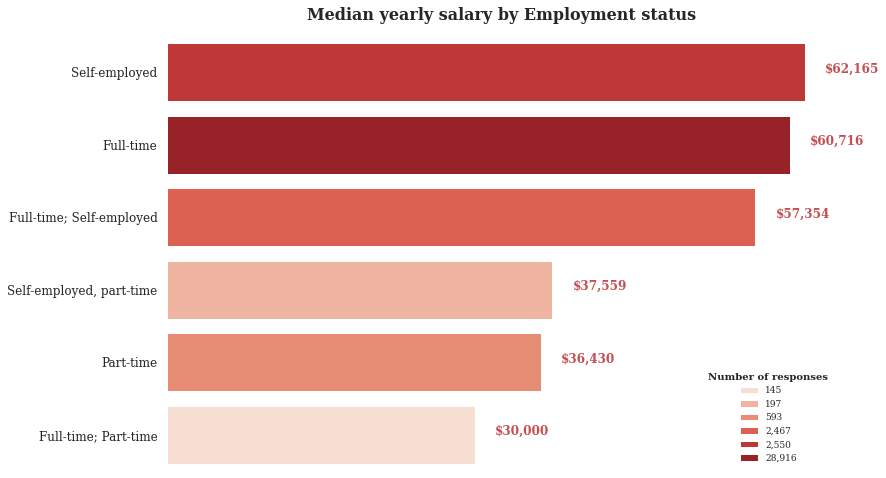

In [26]:
#Create a dataframe that contain employment status information
status_df = df[['Employment','YearsCodePro','AnualCompInUSD']]
status_df.YearsCodePro[status_df['YearsCodePro'] == 'Less than 1 year'] = 1
status_df.YearsCodePro[status_df['YearsCodePro'] == 'More than 50 years'] = 50
status_df.dropna(axis=0, inplace=True)
status_df.reset_index(inplace=True)
status_df['YearsCodePro'] = devtype_df['YearsCodePro'].astype('int64')
status_df.drop('index', axis =1, inplace=True)

#Remove unnecessary status from the table
remove_status = ['I prefer not to say', 'Retired','Employed, full-time;Independent contractor, freelancer, or self-employed;Retired','Employed, part-time;Retired','Independent contractor, freelancer, or self-employed;Retired','Employed, full-time;Retired','Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time']
status_df = status_df[~status_df['Employment'].isin(remove_status)]
status_df.Employment[status_df['Employment'] == 'Employed, full-time'] = 'Full-time'
status_df.Employment[status_df['Employment'] == 'Employed, full-time;Employed, part-time'] = 'Full-time; Part-time'
status_df.Employment[status_df['Employment'] == 'Employed, full-time;Independent contractor, freelancer, or self-employed'] = 'Full-time; Self-employed'
status_df.Employment[status_df['Employment'] == 'Employed, part-time'] = 'Part-time'
status_df.Employment[status_df['Employment'] == 'Independent contractor, freelancer, or self-employed'] = 'Self-employed'
status_df.Employment[status_df['Employment'] == 'Independent contractor, freelancer, or self-employed;Employed, part-time'] = 'Self-employed, part-time'

#Final dataframe to visualize
pv_status_mean = pd.pivot_table(data=status_df,
                                 index='Employment', values='AnualCompInUSD',
                                 aggfunc='median')
pv_status_count = pd.pivot_table(data=status_df,
                                  index='Employment', values='AnualCompInUSD',
                                  aggfunc='count')
pv_status = pv_status_mean.merge(right=pv_status_count,
                                   left_index=True,
                                   right_index=True)
pv_status.rename(columns={'AnualCompInUSD_x': 'MedianAnual',
                           'AnualCompInUSD_y': 'CountAnual'},
                  inplace=True)
pv_status = pv_status.sort_values(by='MedianAnual', ascending=False)

#Visualization
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
plot11 = sns.barplot(data=pv_status, y=pv_status.index, x='MedianAnual', hue='CountAnual', dodge=False, palette='Reds')
plot11.set_yticklabels(labels=pv_status.index, size=12, fontdict={'family': 'serif', 'size': 12, 'weight': 'normal'})
plot11.set_xticklabels(labels='', size=12, fontdict={'family': 'serif', 'size': 12, 'weight': 'normal'})
plt.xlabel(xlabel='', fontsize=16)
plt.ylabel(ylabel='', fontsize=16)
ax.grid(alpha=0)
plt.title('Median yearly salary by Employment status', fontsize=16, loc='center', pad=16,
          fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
sns.despine(left=True, bottom=True)
for i, v in enumerate(pv_status['MedianAnual']):
    ax.text(v + 2000, i, '${:,.0f}'.format(v), color='r', fontdict={'family': 'serif', 'size': 12, 'weight': 'bold'})
    plt.legend(loc='lower right', title='Number of responses',
               title_fontproperties={'family': 'serif', 'weight': 'bold', 'size': 10},
               prop={'family': 'serif', 'weight': 'normal', 'size': 9})
led1 = plot11.get_legend()
led1_text = led1.get_texts()
for text in led1_text:
    i = text.get_text()
    i = i.replace('.0', '')
    new_i = '{:,.0f}'.format(int(i))
    text.set_text(new_i)
plt.show()

/var/folders/tr/xn8v7xg16210g483rgngckhm0000gn/T/ipykernel_27113/1648875227.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot6.set_yticklabels(labels=new_labels, size=12, fontdict={'family': 'serif', 'size': 12, 'weight': 'normal'})


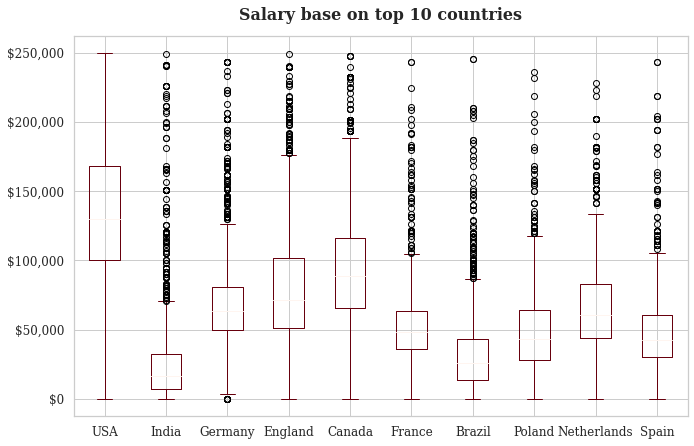

In [27]:
#Create df of top 10 countries
country_df = df[['Country', 'AnualCompInUSD']]
top_10_countries = ['United States of America', 'India', 'Germany',
                    'United Kingdom of Great Britain and Northern Ireland', 'Canada', 'France', 'Brazil', 'Poland',
                    'Netherlands', 'Spain']

#Reformat the table
dict_country = {}
max_freq_country = 7350
for i in top_10_countries:
    list_i = list(country_df[country_df['Country'] == i]['AnualCompInUSD'])
    dict_country[i] = list_i
    if len(dict_country[i]) < max_freq_country:
        a = 7350 - len(dict_country[i])
        for i in range(a):
            list_i.append(None)
top_10_countries_df = pd.DataFrame(dict_country)
top_10_countries_df.rename(
    columns={'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland': 'England'},
    inplace=True)

#Visualization
plot6 = top_10_countries_df[top_10_countries_df.columns].plot(kind='box', title='Salary base on top 10 countries',
                                                              colormap='Reds_r', figsize=(11, 7))
plot6.set_xticklabels(labels=top_10_countries_df.columns, size=12,
                      fontdict={'family': 'serif', 'size': 12, 'weight': 'normal'})
ticks = plot6.get_yticks()
new_labels = ['${:,.0f}'.format(amt) for amt in ticks]
plot6.set_yticklabels(labels=new_labels, size=12, fontdict={'family': 'serif', 'size': 12, 'weight': 'normal'})
plt.title('Salary base on top 10 countries', fontsize=16, loc='center', pad=16,
          fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
plt.show()